In [18]:
from pickle import load
import numpy as np
from sklearn.svm import SVC
import json
from sklearn.metrics import matthews_corrcoef
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import matthews_corrcoef, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [19]:
mccs = {}
reports = {}
f1_scores = {}
accs = {}
y_preds = {}

### Treinamento com GAMMA='AUTO'

In [20]:
for i in tqdm(range(1,101)):
    X_train, y_train = load(open(f'SMILEsmilesD_balanced_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_balanced_features/train_labels_HOGShape_{i}.pkl', 'rb'))
    X_test, y_test = load(open(f'SMILEsmilesD_balanced_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_balanced_features/test_labels_HOGShape_{i}.pkl', 'rb'))
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='rbf', C=1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mcc = matthews_corrcoef(y_true=y_test, y_pred=y_pred, sample_weight=None)
    report = classification_report(y_test, y_pred, target_names=np.unique(y_test), output_dict=True)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=np.unique(y_test)[1])
    acc = accuracy_score(y_test, y_pred)
    if 'gamma_auto' not in mccs.keys():
        mccs['gamma_auto'] = []
        reports['gamma_auto'] = []
        f1_scores['gamma_auto'] = []
        y_preds['gamma_auto'] = []
        accs['gamma_auto'] = []
    mccs['gamma_auto'].append(mcc)
    reports['gamma_auto'].append(report)
    f1_scores['gamma_auto'].append(f1)
    y_preds['gamma_auto'].append(y_pred)
    accs['gamma_auto'].append(acc)

  0%|          | 0/100 [00:00<?, ?it/s]

In [4]:
df = pd.read_csv('SMILEsmilesD_balanced_features/sigmas_frac0.5_mean.csv')

### Treinamento sigest Median

In [21]:
for i in tqdm(range(1,101)):
    X_train, y_train = load(open(f'SMILEsmilesD_balanced_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_balanced_features/train_labels_HOGShape_{i}.pkl', 'rb'))
    X_test, y_test = load(open(f'SMILEsmilesD_balanced_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_balanced_features/test_labels_HOGShape_{i}.pkl', 'rb'))
    clf = make_pipeline(StandardScaler(), SVC(gamma=df['median'][i-1], kernel='rbf', C=1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mcc = matthews_corrcoef(y_true=y_test, y_pred=y_pred, sample_weight=None)
    report = classification_report(y_test, y_pred, target_names=np.unique(y_test), output_dict=True)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=np.unique(y_test)[1])
    acc = accuracy_score(y_test, y_pred)
    if 'sigest_median' not in mccs.keys():
        mccs['sigest_median'] = []
        reports['sigest_median'] = []
        f1_scores['sigest_median'] = []
        y_preds['sigest_median'] = []
        accs['sigest_median'] = []
    mccs['sigest_median'].append(mcc)
    reports['sigest_median'].append(report)
    f1_scores['sigest_median'].append(f1)
    y_preds['sigest_median'].append(y_pred)
    accs['sigest_median'].append(acc)

  0%|          | 0/100 [00:00<?, ?it/s]

### Treinamento sigest 0.9 quantile

In [22]:
for i in tqdm(range(1,101)):
    X_train, y_train = load(open(f'SMILEsmilesD_balanced_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_balanced_features/train_labels_HOGShape_{i}.pkl', 'rb'))
    X_test, y_test = load(open(f'SMILEsmilesD_balanced_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_balanced_features/test_labels_HOGShape_{i}.pkl', 'rb'))
    clf = make_pipeline(StandardScaler(), SVC(gamma=df['09quantile'][i-1], kernel='rbf', C=1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mcc = matthews_corrcoef(y_true=y_test, y_pred=y_pred, sample_weight=None)
    report = classification_report(y_test, y_pred, target_names=np.unique(y_test), output_dict=True)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=np.unique(y_test)[1])
    acc = accuracy_score(y_test, y_pred)
    if 'sigest_0.9quantile' not in mccs.keys():
        mccs['sigest_0.9quantile'] = []
        reports['sigest_0.9quantile'] = []
        f1_scores['sigest_0.9quantile'] = []
        y_preds['sigest_0.9quantile'] = []
        accs['sigest_0.9quantile'] = []
    mccs['sigest_0.9quantile'].append(mcc)
    reports['sigest_0.9quantile'].append(report)
    f1_scores['sigest_0.9quantile'].append(f1)
    y_preds['sigest_0.9quantile'].append(y_pred)
    accs['sigest_0.9quantile'].append(acc)

  0%|          | 0/100 [00:00<?, ?it/s]

### Treinamento sigest media dos quantis

In [23]:
for i in tqdm(range(1,101)):
    X_train, y_train = load(open(f'SMILEsmilesD_balanced_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_balanced_features/train_labels_HOGShape_{i}.pkl', 'rb'))
    X_test, y_test = load(open(f'SMILEsmilesD_balanced_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_balanced_features/test_labels_HOGShape_{i}.pkl', 'rb'))
    gamma_mean_sigest = (df['09quantile'][i-1] + df['01quantile'][i-1]) / 2.
    clf = make_pipeline(StandardScaler(), SVC(gamma=gamma_mean_sigest, kernel='rbf', C=1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mcc = matthews_corrcoef(y_true=y_test, y_pred=y_pred, sample_weight=None)
    report = classification_report(y_test, y_pred, target_names=np.unique(y_test), output_dict=True)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=np.unique(y_test)[1])
    acc = accuracy_score(y_test, y_pred)
    if 'gamma_mean_sigest' not in mccs.keys():
        mccs['gamma_mean_sigest'] = []
        reports['gamma_mean_sigest'] = []
        f1_scores['gamma_mean_sigest'] = []
        y_preds['gamma_mean_sigest'] = []
        accs['gamma_mean_sigest'] = []
    mccs['gamma_mean_sigest'].append(mcc)
    reports['gamma_mean_sigest'].append(report)
    f1_scores['gamma_mean_sigest'].append(f1)
    y_preds['gamma_mean_sigest'].append(y_pred)
    accs['gamma_mean_sigest'].append(acc)

  0%|          | 0/100 [00:00<?, ?it/s]

### Treinamento gamma = 1/N

In [24]:
if False:
    for i in tqdm(range(1,101)):
        X_train, y_train = load(open(f'SMILEsmilesD_balanced_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                            load(open(f'SMILEsmilesD_balanced_features/train_labels_HOGShape_{i}.pkl', 'rb'))
        X_test, y_test = load(open(f'SMILEsmilesD_balanced_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                            load(open(f'SMILEsmilesD_balanced_features/test_labels_HOGShape_{i}.pkl', 'rb'))
        gamma_N = 1./(X_train.shape[0])
        clf = make_pipeline(StandardScaler(), SVC(gamma=gamma_N, kernel='rbf', C=1))
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        mcc = matthews_corrcoef(y_true=y_test, y_pred=y_pred, sample_weight=None)
        report = classification_report(y_test, y_pred, target_names=np.unique(y_test), output_dict=True)
        f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=np.unique(y_test)[1])
        acc = accuracy_score(y_test, y_pred)
        if 'gamma_N' not in mccs.keys():
            mccs['gamma_N'] = []
            reports['gamma_N'] = []
            f1_scores['gamma_N'] = []
            y_preds['gamma_N'] = []
            accs['gamma_N'] = []
        mccs['gamma_N'].append(mcc)
        reports['gamma_N'].append(report)
        f1_scores['gamma_N'].append(f1)
        y_preds['gamma_N'].append(y_pred)
        accs['gamma_N'].append(acc)

In [25]:
for k, v in mccs.items():
    mcc_var = np.array(v).var()
    mcc_mean = np.array(v).mean()
    print(f'Mean MCC score for {k} is {mcc_mean} with variation {mcc_var}')

Mean MCC score for gamma_auto is 0.9012224562542553 with variation 0.0004399569235513652
Mean MCC score for sigest_median is 0.9008188891828371 with variation 0.0004932114846769714
Mean MCC score for sigest_0.9quantile is 0.9016538794928838 with variation 0.00046702604829308085
Mean MCC score for gamma_mean_sigest is 0.9011049931285278 with variation 0.0004727322284693805


In [27]:
for k, v in accs.items():
    acc_var = np.array(v).var()
    acc_mean = np.array(v).mean()
    print(f'Mean ACC score for {k} is {acc_mean} with variation {acc_var}')

Mean ACC score for gamma_auto is 0.9505555555555554 with variation 0.00011003086419753108
Mean ACC score for sigest_median is 0.9503611111111111 with variation 0.0001234035493827162
Mean ACC score for sigest_0.9quantile is 0.9507777777777777 with variation 0.00011652469135802482
Mean ACC score for gamma_mean_sigest is 0.9505000000000001 with variation 0.00011826851851851868


In [38]:
with open('mccs_balanced.json', 'w') as jsonFile:
    json.dump(mccs, jsonFile, indent=2)
with open('accs_balanced.json', 'w') as jsonFile:
    json.dump(accs, jsonFile, indent=2)
with open('f1scores_balanced.json', 'w') as jsonFile:
    json.dump(f1_scores, jsonFile, indent=2)

In [42]:
for i in range(4):
    print(len(list(accs.values())[i]), len(list(mccs.values())[i]), len(list(f1_scores.values())[i]))

100 100 100
100 100 100
100 100 100
100 100 100


GAMMA gamma_auto
F1-score for smile using gamma gamma_auto is 0.9501048313633227 with variation 0.00012750152927208807
F1-score for notsmile using gamma gamma_auto is 0.9508288828268208 with variation 0.00010272167701481383

GAMMA sigest_median
F1-score for smile using gamma sigest_median is 0.9499294596289993 with variation 0.00014302607296058916
F1-score for notsmile using gamma sigest_median is 0.9506192007662313 with variation 0.00011369610750870291

GAMMA sigest_0.9quantile
F1-score for smile using gamma sigest_0.9quantile is 0.950309630339243 with variation 0.00013654365311642594
F1-score for notsmile using gamma sigest_0.9quantile is 0.9510670136241347 with variation 0.00010701184950126023

GAMMA gamma_mean_sigest
F1-score for smile using gamma gamma_mean_sigest is 0.9500641619971409 with variation 0.00013745338187183564
F1-score for notsmile using gamma gamma_mean_sigest is 0.9507624463055575 with variation 0.00010889838130637885



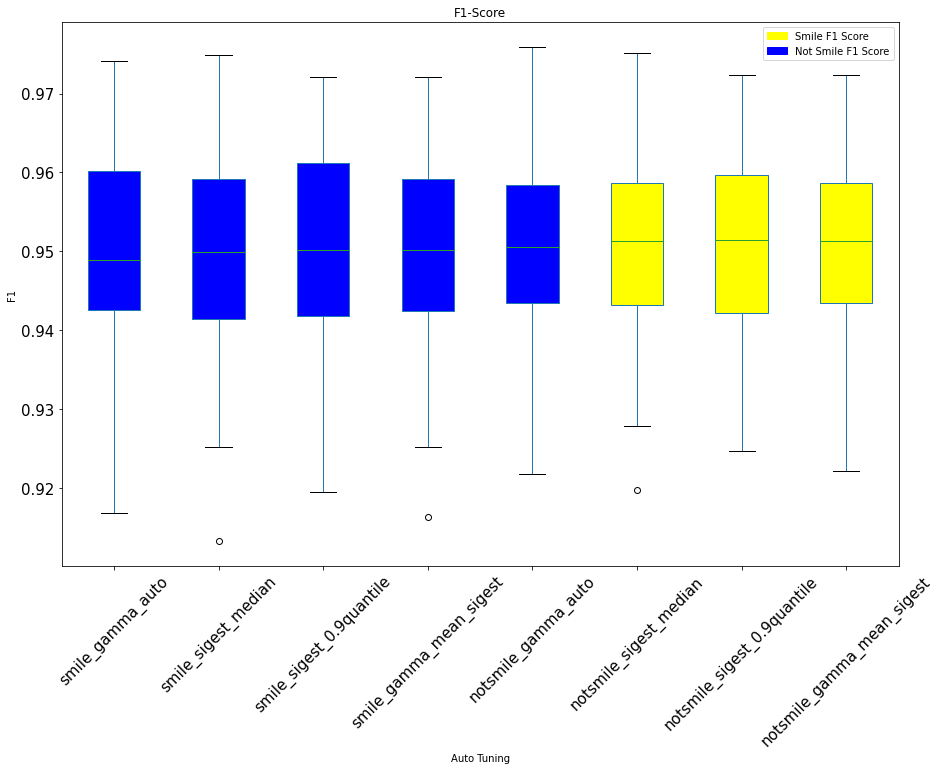

In [28]:
f1s = []
for k, v in reports.items():
    f1s_smile = []
    f1s_notsmile = []
    for report in v:
        f1s_smile.append(report['smile']['f1-score'])
        f1s_notsmile.append(report['notsmile']['f1-score'])
    f1s_smile = np.array(f1s_smile)
    f1s_notsmile = np.array(f1s_notsmile)
    f1s.append([k, f1s_smile, f1s_notsmile])
    print(f'GAMMA {k}')
    print(f'F1-score for smile using gamma {k} is {f1s_smile.mean()} with variation {f1s_smile.var()}')
    print(f'F1-score for notsmile using gamma {k} is {f1s_notsmile.mean()} with variation {f1s_notsmile.var()}')
    print('')
f1df_smile = pd.DataFrame(np.array([x[1] for x in f1s]).T, columns=['smile_' + x[0] for x in f1s])
f1df_notsmile = pd.DataFrame(np.array([x[2] for x in f1s]).T, columns=['notsmile_' + x[0] for x in f1s])

f1df = f1df_smile.append(f1df_notsmile)
plot = f1df.boxplot(figsize=(15,10), grid=False, rot=45, return_type='dict', patch_artist = True,fontsize=15)
colors = ['blue', 'yellow']
i = 0
for patch in plot['boxes']:
    patch.set(facecolor = colors[0] if i<5 else colors[1])
    i-=-1
plt.title('F1-Score')
plt.xlabel('Auto Tuning')
plt.ylabel('F1')
plt.suptitle('')
red_patch = mpatches.Patch(color='yellow', label='Smile F1 Score')
blue_patch = mpatches.Patch(color='blue', label='Not Smile F1 Score')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

GAMMA gamma_auto
F1-score is 0.9501048313633227 with variation 0.00012750152927208807

GAMMA sigest_median
F1-score is 0.9499294596289993 with variation 0.00014302607296058916

GAMMA sigest_0.9quantile
F1-score is 0.950309630339243 with variation 0.00013654365311642594

GAMMA gamma_mean_sigest
F1-score is 0.9500641619971409 with variation 0.00013745338187183564



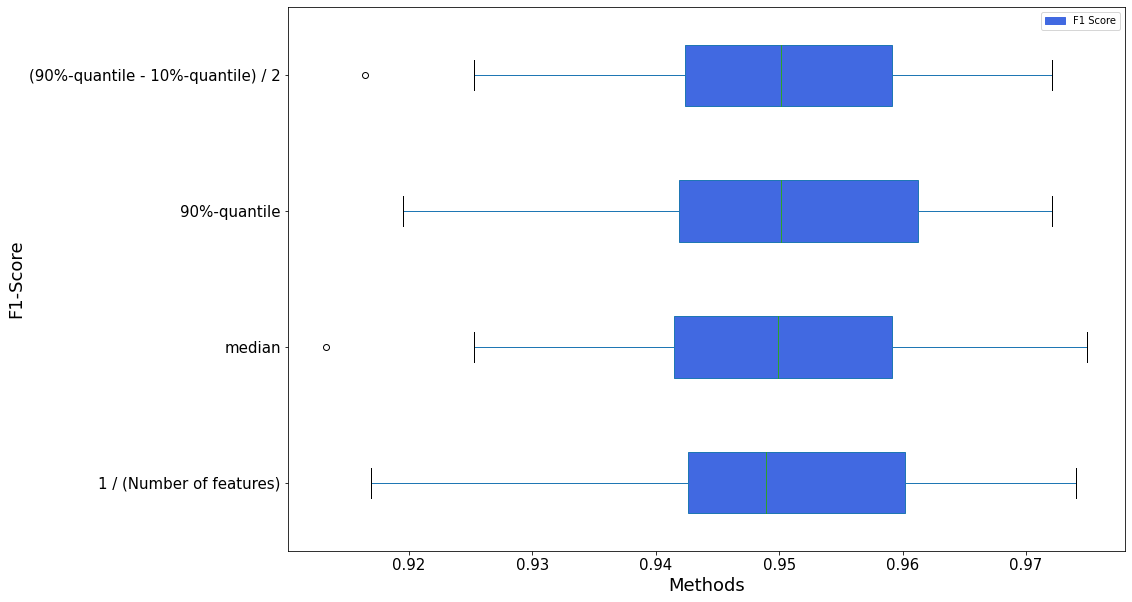

In [37]:
f1s = []
for k, v in f1_scores.items():
    f1_score = []
    for f1 in v:
        f1_score.append(f1)
    f1_score = np.array(f1_score)
    f1s.append([k, f1_score])
    print(f'GAMMA {k}')
    print(f'F1-score is {f1_score.mean()} with variation {f1_score.var()}')
    print('')
f1df = pd.DataFrame(np.array([x[1] for x in f1s]).T, columns=[x[0] for x in f1s])

f1df = f1df.rename(columns={'gamma_N_smile': '1 / (Number of samples)',
                              'gamma_N_notsmile': '1 / (Number of samples)',
                              'gamma_mean_sigest': '(90%-quantile - 10%-quantile) / 2',
                              'gamma_mean_sigest_notsmile': '(90%-quantile - 10%-quantile) / 2',
                              'sigest_0.9quantile': '90%-quantile',
                              'sigest_0.9quantile_notsmile': '90%-quantile',
                              'sigest_median': 'median',
                              'sigest_median_notsmile': 'median',
                              'gamma_auto': '1 / (Number of features)',
                              'gamma_auto_notsmile': '1 / (Number of features)'})

plot = f1df.boxplot(figsize=(15,10), grid=False, rot=0, return_type='dict', patch_artist = True,fontsize=15, vert=False)
colors = ['royalblue', 'yellow']
i = 0
for patch in plot['boxes']:
    patch.set(facecolor = colors[0] if i<5 else colors[1])
    i-=-1
plt.xlabel('Methods', fontsize=18)
plt.ylabel('F1-Score', fontsize=18)
plt.suptitle('')
blue_patch = mpatches.Patch(color='royalblue', label='F1 Score')
plt.legend(handles=[blue_patch])
plt.show()